In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV, RandomizedSearchCV
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, scale, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import kstest,zscore
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv("C:\\Users\\şerefcanmemiş\\Downloads\\insurance.csv")

## 1 - Veriyi İnceliyoruz

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum().sum()

0

Veride NA değeri yani eksik gözlem olmadığını görüyoruz.

**Aykırı değerleri (Outlier) görmek için sayısal değişkenlerde kutu grafiği (boxplot) çizdiriyoruz.**

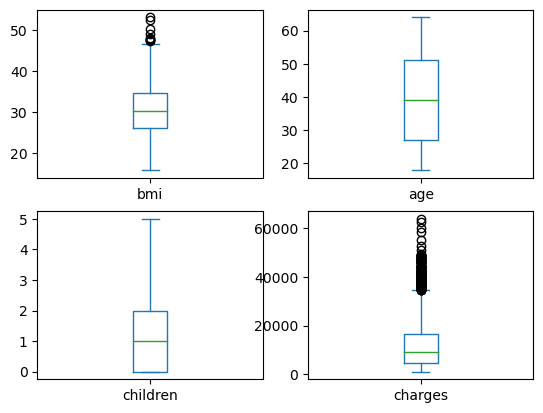

In [8]:
fig,axs=plt.subplots(2,2)
df['bmi'].plot(ax = axs[0,0],kind='box')
df['age'].plot(ax = axs[0,1],kind='box')
df['children'].plot(ax = axs[1,0],kind='box')
df['charges'].plot(ax = axs[1,1],kind='box')
plt.show()

**Sigara içen ve sigara içmeyenlerin dağılımını pasta grafiği (pieplot) yardımı ile görüyoruz.**

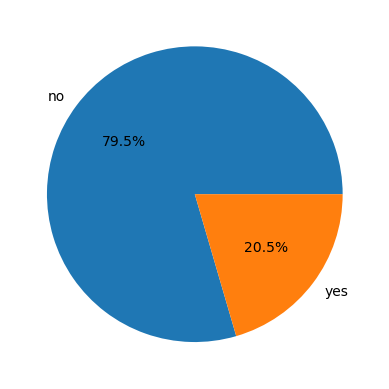

In [9]:
cinsiyet = df['smoker'].value_counts()
labels = cinsiyet.index
plt.pie(cinsiyet,labels=labels,autopct='%1.1f%%')
plt.show()

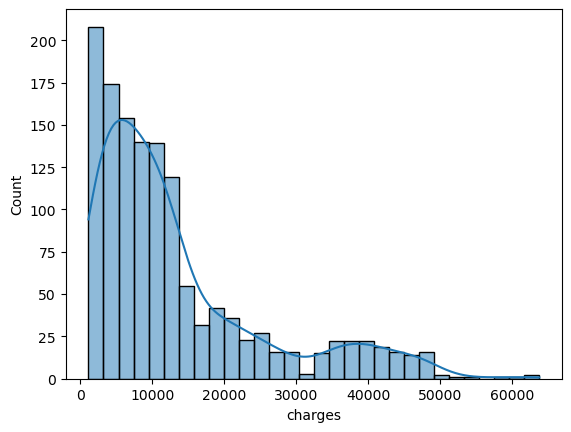

In [10]:
sns.histplot(df['charges'],kde=True)
plt.show()

**Kategorik olan sütunları modele ekleyebilmek için sayısal değerlere dönüştürüyoruz.**

In [11]:
for column in ['sex','smoker']:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


**Aynı şekilde dummy değişkenleri de dönüştürüyoruz**.    (Burada n-1 sutun oluşturmamızın sebebi regresyon modelinde çoklu doğrusal bağlantıyı engellemek.)

In [12]:
df = pd.get_dummies(df,columns=['region'],prefix='region',dtype=int,drop_first=True)
df.sample(5)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
1236,63,0,21.660,0,0,14449.85440,0,0,0
179,41,0,33.155,3,0,8538.28845,0,0,0
905,26,0,29.355,2,0,4564.19145,0,0,0
130,59,0,26.505,0,0,12815.44495,0,0,0
209,40,1,41.230,1,0,6610.10970,0,0,0


## Modelleme

### Lineer Regresyon

In [13]:
X = df.drop('charges',axis = 1)
y = df['charges']
x_egitim, x_test, y_egitim, y_test = train_test_split(X,y,test_size = 0.2)

In [14]:
model = LinearRegression().fit(x_egitim,y_egitim)
pred = model.predict(x_test)
error = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)
mape = mean_absolute_percentage_error(y_test,pred)
print(f'R^2 değeri: {r2:.4f}')
print(f'mean squared error (MSE) değeri: {error:.4f}')
print(f'mean absolute percentage error (MAPE) değeri: {mape}')

R^2 değeri: 0.7503
mean squared error (MSE) değeri: 33086110.6284
mean absolute percentage error (MAPE) değeri: 0.3885759218441557


### Lineer Regesyon için varsayım kontrolleri

#### 1- Doğrusallık Varsayımı

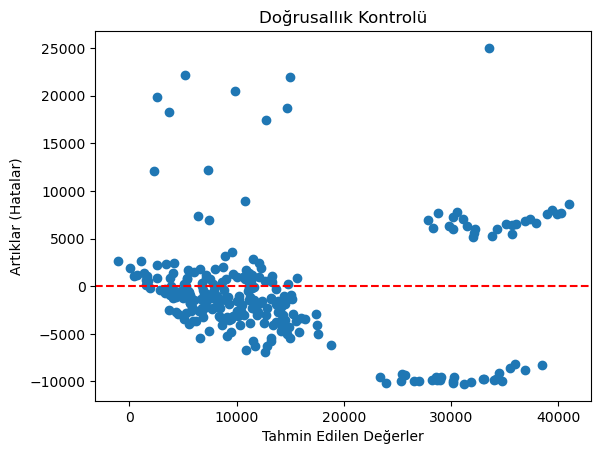

In [15]:
plt.scatter(pred, y_test-pred)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Tahmin Edilen Değerler")
plt.ylabel("Artıklar (Hatalar)")
plt.title("Doğrusallık Kontrolü")
plt.show()

#### 2- Degisen Varyans Varsayımı

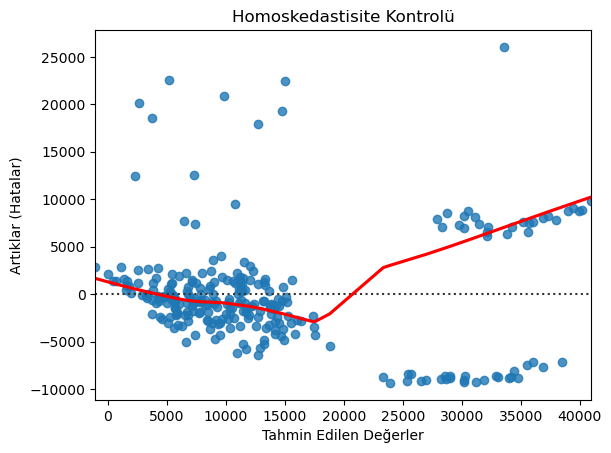

In [16]:
sns.residplot(x=pred, y=y_test - pred,lowess=True,line_kws={'color': 'red'})
plt.xlabel("Tahmin Edilen Değerler")
plt.ylabel("Artıklar (Hatalar)")
plt.title("Homoskedastisite Kontrolü")
plt.show()

Değişen Varyans varsayımı sağlanmıyor.

#### 3- Normallik Varsayımı

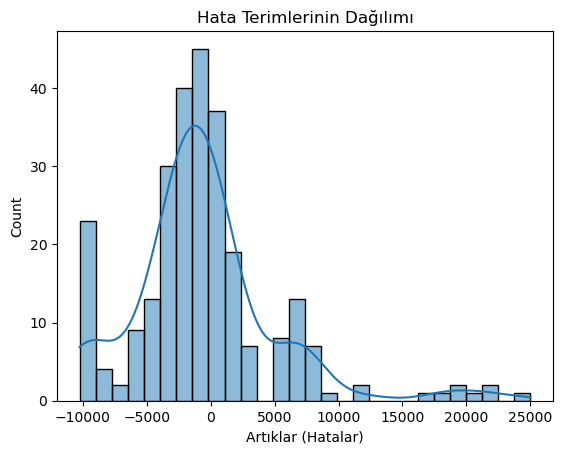

In [17]:
sns.histplot(y_test - pred, kde=True)
plt.xlabel("Artıklar (Hatalar)")
plt.title("Hata Terimlerinin Dağılımı")
plt.show()

In [18]:
zskoru = zscore(df['charges'])
df = df[zskoru.abs()<3]
k,p_value = kstest(y_test-pred,'norm')
print('p_value :',p_value)

p_value : 5.786517138999255e-108


Aykırı değerleri çıkarmamıza rağmen p-value degeri 0.05'ten çok küçük geldi yani hatalar normal dağılmıyor.

#### 4- Otokorelasyon (Hataların bağımsızlığı)

In [19]:
dw_stat = durbin_watson(y_test - pred)
print(f"Durbin-Watson Test İstatistiği: {dw_stat:.4f}")

Durbin-Watson Test İstatistiği: 1.9660


Durbin-Watson test istatisiği 0-4 arasında değer alır 2'ye yakın olması burada otokorelasyon olmadığının göstergesidir.

#### 5- Çoklu Doğrusal Bağlantı

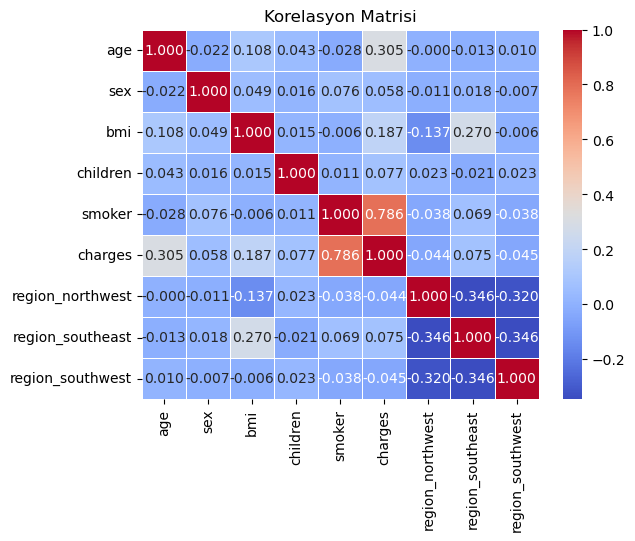

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()

In [21]:
vif = pd.DataFrame(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest','region_southeast', 'region_southwest'])
vif['vif'] = [variance_inflation_factor(x_egitim.values,i) for i in range(len(x_egitim.columns))]
vif

,0,vif
0,age,7.593909
1,sex,1.944541
2,bmi,11.088470
3,children,1.787541
4,smoker,1.262972
5,region_northwest,1.851530
6,region_southeast,2.321366
7,region_southwest,1.957330


age ve bmi'ın vif değerleri yüksek geldi bunlar PCA veya çıkarma işlemi ile düzeltilebilir.

Aykırı değerler çıktıktan sonra **Lineer Regresyon** modelini tekrar kuruyoruz.

In [22]:
X = df.drop('charges',axis = 1)
y = df['charges']
x_egitim, x_test, y_egitim, y_test = train_test_split(X,y,test_size = 0.2)
print(x_egitim.shape)
print(y_egitim.shape)

(1064, 8)
(1064,)


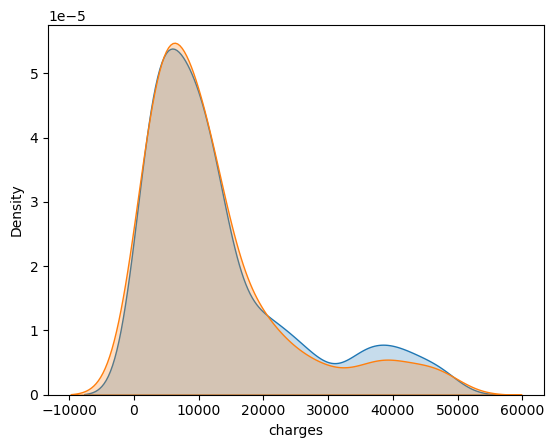

In [23]:
sns.kdeplot(y_egitim, label="Eğitim Seti", fill=True)
sns.kdeplot(y_test, label="Test Seti", fill=True)
plt.show()

Charges değişkeninin eğitim seti ile test seti dağılımları birbirlerine benzer olup olmadığını görmek için kdeplot çizdirdik.

**Fakat Burada Varsayımlardan sağlanmayanlar olduğu için Lineer Regresyon geçersiz bir modeldir.**

### Temel Bileşen Analizi (PCA)

In [24]:
cv = KFold(n_splits=5,shuffle=True,random_state=40)
pca = PCA()
x_egitim_scaled = pca.fit_transform(scale(x_egitim))
regression = LinearRegression()
mse = []
for i in range(1,x_egitim.shape[1]+1):
    score = -1*model_selection.cross_val_score(regression, x_egitim_scaled[:,:i], y_egitim, cv=cv,
                                           scoring="neg_mean_squared_error").mean()
    mse.append(score)
print(f'explained_variance_ratio_: {round(sum(pca.explained_variance_ratio_),4)}')

explained_variance_ratio_: 1.0


Burada açıklanmış varyans oranının 1 gelmesinin sebebi butun değişkenleri kullanması yani boyut indirgememesidir.

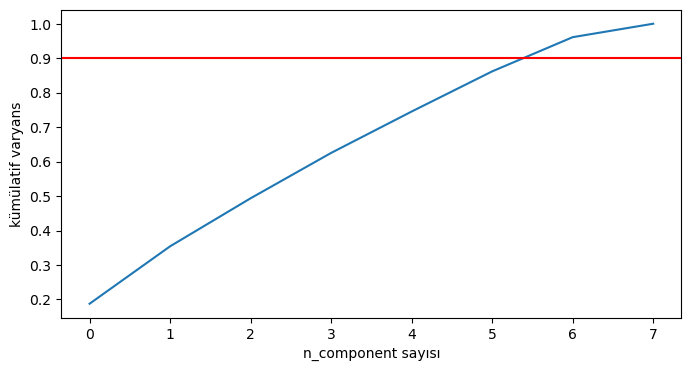

In [25]:
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.90, c='r')
plt.xlabel('n_component sayısı')
plt.ylabel('kümülatif varyans')
plt.show()

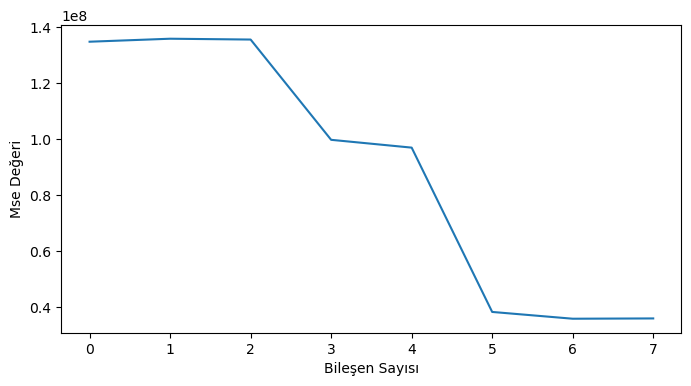

In [26]:
plt.figure(figsize=(8,4))
plt.plot(mse)
plt.xlabel('Bileşen Sayısı')
plt.ylabel('Mse Değeri')
plt.show()

Keskin düşüşlerin olduğu değişkenler veriyi iyi açıklayan değişkenlerdir.

In [27]:
x_test_scaled = pca.fit_transform(scale(x_test))
pcreg = model.fit(x_egitim_scaled,y_egitim)
pred = pcreg.predict(x_test_scaled)

error = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)
print(f'R^2 değeri: {r2:.4f}')
print(f'mean squared error (MSE) değeri: {error:.4f}')

R^2 değeri: -0.2208
mean squared error (MSE) değeri: 150376636.6963


### Kısmi En Küçük Kareler Regresyonu (PLS)

In [28]:
pls_model = PLSRegression()
def optimum_pls(x,y,ncomp):
    model = PLSRegression(n_components=ncomp)
    cv_step = cross_val_predict(model,x,y,cv=5)
    mse = mean_squared_error(y,cv_step)
    r2 = r2_score(y,cv_step)
    return (cv_step,mse,r2)

In [29]:
sonuc_df = pd.DataFrame(columns = ['ncomp','R^2','MSE'])
r2 = []
mse_list = []
ncomp = []
for i in np.arange(1,9):
    cv.step,mse,rsq= optimum_pls(x_egitim, y_egitim, i)
    r2.append(rsq)
    mse_list.append(mse)
    ncomp.append(i)
    
sonuc_df['ncomp'] = ncomp
sonuc_df['R^2'] = r2
sonuc_df['MSE'] = mse_list
sonuc_df

,ncomp,R^2,MSE
0,1,0.729060,3.792616e+07
1,2,0.744042,3.582890e+07
2,3,0.744150,3.581389e+07
3,4,0.744092,3.582194e+07
4,5,0.744134,3.581603e+07
5,6,0.744134,3.581603e+07
6,7,0.744137,3.581562e+07
7,8,0.744137,3.581563e+07


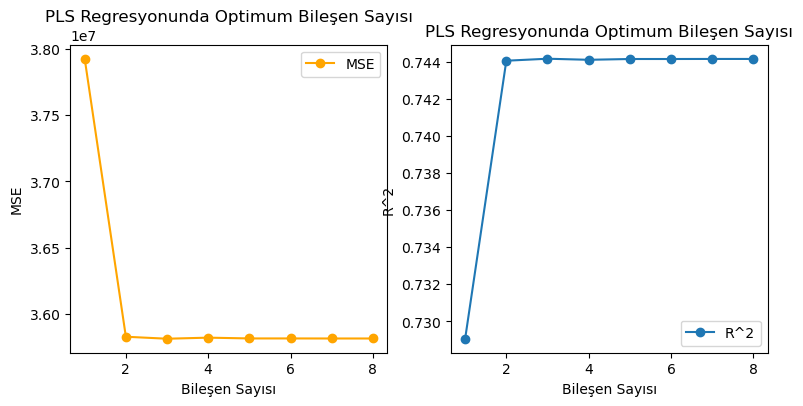

In [30]:
fig,axs = plt.subplots(1,2, figsize=(9,4))
axs[0].plot(range(1, 9), mse_list, marker='o', label='MSE',color='orange')
axs[0].set_xlabel("Bileşen Sayısı")
axs[0].set_ylabel("MSE")
axs[0].set_title("PLS Regresyonunda Optimum Bileşen Sayısı")
axs[0].legend()

axs[1].plot(range(1, 9), r2, marker='o', label='R^2')
axs[1].set_xlabel("Bileşen Sayısı")
axs[1].set_ylabel("R^2")
axs[1].set_title("PLS Regresyonunda Optimum Bileşen Sayısı")
axs[1].legend()
plt.show()

In [31]:
model2= PLSRegression(n_components=2).fit(x_egitim, y_egitim)
pred2= model2.predict(x_test)
error = mean_squared_error(y_test,pred2)
r2 = r2_score(y_test,pred2)
print(f'R^2 değeri: {r2:.4f}')
print(f'mean squared error (MSE) değeri: {error:.4f}')

R^2 değeri: 0.7603
mean squared error (MSE) değeri: 29525066.6785


Optimum n_components'ı 2 olarak buluyoruz.

### Ridge Regresyon

In [32]:
scaler = StandardScaler()
x_egitim_scaled = scaler.fit_transform(x_egitim)
x_test_scaled = scaler.transform(x_test)

In [33]:
alphas = np.array([0.001,0.01,0.1,0.2,0.5,1,1.1,2,3,4,4.5,5,10])
ridge_model = RidgeCV(alphas=alphas,cv=5).fit(x_egitim_scaled,y_egitim)
preds = ridge_model.predict(x_test_scaled)

error = mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
print(f'R^2 değeri: {r2:.4f}')
print(f'mean squared error (MSE) değeri: {error:.4f}')
print(f'optimum alpha değeri: {ridge_model.alpha_}')

R^2 değeri: 0.7609
mean squared error (MSE) değeri: 29454521.4798
optimum alpha değeri: 10.0


### Lasso Regresyon

In [34]:
lasso_model = LassoCV(cv=10,max_iter=500).fit(x_egitim_scaled,y_egitim)
preds = lasso_model.predict(x_test_scaled)
error = mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)

print(f'R^2 değeri: {r2:.4f}')
print(f'mean squared error (MSE) değeri: {error:.4f}')
print(f'optimum alpha değeri: {lasso_model.alpha_:.4f}')

R^2 değeri: 0.7608
mean squared error (MSE) değeri: 29461028.6381
optimum alpha değeri: 13.1757


### K En Yakın Komşular Regresyonu (KNN)

In [35]:
knn_regression = KNeighborsRegressor()
params= {"n_neighbors":[2,3,5,5,6,7,8,9,10,15,20,30]}
KNN_Model = GridSearchCV(knn_regression,param_grid=params,cv=5).fit(x_egitim_scaled,y_egitim)
preds = KNN_Model.predict(x_test_scaled)

error = mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
print(f'R^2 değeri: {r2:.4f}')
print(f'mean squared error (MSE) değeri: {error:.4f}')
print(f'optimum n_neighbors değeri: {KNN_Model.best_params_}')

R^2 değeri: 0.8279
mean squared error (MSE) değeri: 21204902.3226
optimum n_neighbors değeri: {'n_neighbors': 5}


KNN scale etmeden kötü sonuç verdi scale edince modelin performansı arttı.

### Destek Vektör Makineleri (SVM)

In [36]:
model_svr = SVR(kernel="linear").fit(x_egitim,y_egitim)
y_pred = model_svr.predict(x_test)
mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)

-0.06236921824629893

In [37]:
scale = StandardScaler()
x_egitim_scaled = scale.fit_transform(x_egitim)
x_test_scaled = scale.fit_transform(x_test)

In [38]:
svr_params = {'C':np.arange(100,160,1),'epsilon':[0.1]}
GSCV_SVR_model = GridSearchCV(model_svr,svr_params,cv = 10)
model_GS = GSCV_SVR_model.fit(x_egitim_scaled,y_egitim)

opt_c = pd.Series(model_GS.best_params_)[0]
opt_e = pd.Series(model_GS.best_params_)[1]
model_optimum = SVR(kernel = "linear", C = opt_c, epsilon = opt_e).fit(x_egitim_scaled, y_egitim)

y_pred_optimum = model_optimum.predict(x_test_scaled)
error = mean_squared_error(y_test, y_pred_optimum)
r2 = r2_score(y_test, y_pred_optimum)
print(f'R^2 değeri: {r2:.4f}')
print(f'mean squared error (MSE) değeri: {error:.4f}')
print(f'optimum C değeri: {opt_c:.2f}')
print(f'optimum epsilon değeri: {opt_e:.2f}')

R^2 değeri: 0.7241
mean squared error (MSE) değeri: 33983536.8803
optimum C değeri: 159.00
optimum epsilon değeri: 0.10


### Yapay Sinir Ağları (ANN - MLP)

In [80]:
scale = MinMaxScaler()
x_egitim_scaled = scale.fit_transform(x_egitim)
x_test_scaled = scale.fit_transform(x_test)

In [102]:
ann_model = MLPRegressor(solver='lbfgs',learning_rate_init=0.0005).fit(x_egitim_scaled, y_egitim)
ann_model.n_layers_
ann_model.hidden_layer_sizes

ann_pred = ann_model.predict(x_test_scaled)
mean_squared_error(y_test, ann_pred)
r2_score(y_test, ann_pred)

C:\Users\şerefcanmemiş\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.8737351712515818

In [103]:
params_ann = {'alpha':[1,0.8,1.2],
              'hidden_layer_sizes':[(20,20),(100,50,150)],
              'activation':['relu','identity','tanh']}

RS_ann_model = GridSearchCV(ann_model, params_ann, cv=5).fit(x_egitim_scaled,y_egitim)
best_params = pd.Series(RS_ann_model.best_params_)

best_pred = RS_ann_model.predict(x_test_scaled)
error = mean_squared_error(y_test, best_pred)
r2 = r2_score(y_test, best_pred)
print(f'R^2 değeri: {r2:.4f}')
print(f'mean squared error (MSE) değeri: {error:.4f}')
print(f'optimum alpha değeri: {best_params[1]:.4f}')
print(f'optimum hidden_layer_sizes değeri: {best_params[0]}')
print(f'activation değeri: {best_params[2]}')

C:\Users\şerefcanmemiş\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\şerefcanmemiş\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\şerefcanmemiş\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541

R^2 değeri: 0.8860
mean squared error (MSE) değeri: 16362819.3046
optimum alpha değeri: 0.8000
optimum hidden_layer_sizes değeri: relu
activation değeri: (20, 20)


C:\Users\şerefcanmemiş\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\şerefcanmemiş\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Karar Ağaçları (Decision Trees)

In [43]:
DT_model = DecisionTreeRegressor().fit(x_egitim,y_egitim)
pred = DT_model.predict(x_test)

error = mean_squared_error(y_test,pred)
R2 = r2_score(y_test,pred)

0.6939173035989594